<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

<h2>Unsupervised Analysis Project</h2><br>

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

1) During this project we attempted to discover and classify the clusters of survey participants. Identifying the cluster segments of your customers and clients can help a business provide more niche marketing, services, and products that attend to specific needs. Knowing your customers is imperative to innovation, growth, and continually improving performance.
 
In this initial step, we import all of the packages and data that we will be using throughout the project.


In [3]:
########################################
# importing packages
########################################
import numpy             as np  # mathematical essentials
import pandas            as pd  # data science essentials
import matplotlib.pyplot as plt # fundamental data visualization
import seaborn           as sns # enhanced visualization
import sys                      # system-specific parameters and functions
from sklearn.decomposition   import PCA            # pca
from sklearn.datasets        import load_digits    # digits dataset
from sklearn.preprocessing   import StandardScaler # standard scaler
from scipy.cluster.hierarchy import dendrogram, linkage # dendrograms
from sklearn.cluster         import KMeans # k-means clustering

file = "./__datasets/Mobile_App_Survey_Data.xlsx"

MASD = pd.read_excel(io       = file,
                   header     = 0,
                   sheet_name = 0)

MASD.columns

Index(['caseID', 'q1', 'q2r1', 'q2r2', 'q2r3', 'q2r4', 'q2r5', 'q2r6', 'q2r7',
       'q2r8', 'q2r9', 'q2r10', 'q4r1', 'q4r2', 'q4r3', 'q4r4', 'q4r5', 'q4r6',
       'q4r7', 'q4r8', 'q4r9', 'q4r10', 'q4r11', 'q11', 'q12', 'q13r1',
       'q13r2', 'q13r3', 'q13r4', 'q13r5', 'q13r6', 'q13r7', 'q13r8', 'q13r9',
       'q13r10', 'q13r11', 'q13r12', 'q24r1', 'q24r2', 'q24r3', 'q24r4',
       'q24r5', 'q24r6', 'q24r7', 'q24r8', 'q24r9', 'q24r10', 'q24r11',
       'q24r12', 'q25r1', 'q25r2', 'q25r3', 'q25r4', 'q25r5', 'q25r6', 'q25r7',
       'q25r8', 'q25r9', 'q25r10', 'q25r11', 'q25r12', 'q26r18', 'q26r3',
       'q26r4', 'q26r5', 'q26r6', 'q26r7', 'q26r8', 'q26r9', 'q26r10',
       'q26r11', 'q26r12', 'q26r13', 'q26r14', 'q26r15', 'q26r16', 'q26r17',
       'q48', 'q49', 'q50r1', 'q50r2', 'q50r3', 'q50r4', 'q50r5', 'q54', 'q55',
       'q56', 'q57'],
      dtype='object')

In [4]:
# Checking for missing values
MASD.isnull().any().sum()

0

In [5]:
########################################
# scree_plot
########################################
def scree_plot(pca_object, export = False):
    """
    Visualizes a scree plot from a pca object.
    
    PARAMETERS
    ----------
    pca_object | A fitted pca object
    export     | Set to True if you would like to save the scree plot to the
               | current working directory (default: False)
    """
    # building a scree plot

    # setting plot size
    fig, ax = plt.subplots(figsize=(10, 8))
    features = range(pca_object.n_components_)


    # developing a scree plot
    plt.plot(features,
             pca_object.explained_variance_ratio_,
             linewidth = 2,
             marker = 'o',
             markersize = 10,
             markeredgecolor = 'black',
             markerfacecolor = 'grey')


    # setting more plot options
    plt.title('Scree Plot')
    plt.xlabel('PCA feature')
    plt.ylabel('Explained Variance')
    plt.xticks(features)

    if export == True:
    
        # exporting the plot
        plt.savefig('./__analysis_images/MASD_correlation_scree_plot.png')
        
    # displaying the plot
    plt.show()


########################################
# unsupervised_scaler
########################################
def unsupervised_scaler(df):
    """
    Standardizes a dataset (mean = 0, variance = 1). Returns a new DataFrame.
    Requires sklearn.preprocessing.StandardScaler()
    
    PARAMETERS
    ----------
    df     | DataFrame to be used for scaling
    """

    # INSTANTIATING a StandardScaler() object
    scaler = StandardScaler()


    # FITTING the scaler with the data
    scaler.fit(df)


    # TRANSFORMING our data after fit
    x_scaled = scaler.transform(df)

    
    # converting scaled data into a DataFrame
    new_df = pd.DataFrame(x_scaled)


    # reattaching column names
    new_df.columns = df.columns
    
    return new_df

In [6]:
# check value counts for each answer
for col in MASD:
    print(MASD[col].value_counts())

1       1
1629    1
1652    1
1651    1
1649    1
       ..
760     1
759     1
757     1
755     1
2396    1
Name: caseID, Length: 1552, dtype: int64
2     388
3     251
4     211
5     176
6     147
7     128
8      97
9      71
10     35
1      33
11     15
Name: q1, dtype: int64
1    781
0    771
Name: q2r1, dtype: int64
0    1178
1     374
Name: q2r2, dtype: int64
0    987
1    565
Name: q2r3, dtype: int64
0    1240
1     312
Name: q2r4, dtype: int64
0    1466
1      86
Name: q2r5, dtype: int64
0    1415
1     137
Name: q2r6, dtype: int64
0    1488
1      64
Name: q2r7, dtype: int64
0    1251
1     301
Name: q2r8, dtype: int64
0    1494
1      58
Name: q2r9, dtype: int64
0    1552
Name: q2r10, dtype: int64
1    1078
0     474
Name: q4r1, dtype: int64
0    1255
1     297
Name: q4r2, dtype: int64
0    832
1    720
Name: q4r3, dtype: int64
0    1139
1     413
Name: q4r4, dtype: int64
1    1187
0     365
Name: q4r5, dtype: int64
1    1262
0     290
Name: q4r6, dtype: int64
1    826
0 

2) Here we are prepping the data and separating the columns into three categories: the first being psychometric data, the second is usage behavior, and lastly demographic information. We achieved this by making three copies of the original data frame and then dropped all of the columns that did not meet the category criteria. This step is crucial as one cannot draw conclusions from the principal component analysis if the data/columns that are being analyzed are not of the same category type. In the upcoming cells we will be manipulating the psychometric data and the usage behavior, the demographic data will be concatenated later.


In [7]:
# copying dataframe
MASD_P = pd.DataFrame.copy(MASD)
MASD_D = pd.DataFrame.copy(MASD) 
MASD_B = pd.DataFrame.copy(MASD)

MASD_P_drop = ['caseID', 'q1', 'q48', 'q49', 'q50r1', 'q50r2', 'q50r3', 'q50r4', 'q50r5', 'q54', 'q55', 'q56', 'q57', 'q2r1', 'q2r2', 'q2r3', 'q2r4', 'q2r5', 'q2r6', 'q2r7', 'q2r8', 'q2r9', 'q2r10', 'q4r1', 'q4r2', 'q4r3', 'q4r4', 'q4r5', 'q4r6', 'q4r7', 'q4r8', 'q4r9', 'q4r10', 'q4r11', 'q11', 'q12', 'q13r1', 'q13r2', 'q13r3', 'q13r4', 'q13r5', 'q13r6', 'q13r7', 'q13r8', 'q13r9', 'q13r10', 'q13r11', 'q13r12','q25r1', 'q25r2', 'q25r3', 'q25r4', 'q25r5', 'q25r6', 'q25r7', 'q25r8', 'q25r9', 'q25r10', 'q25r11', 'q25r12']
MASD_D_drop = ['caseID', 'q24r1', 'q24r2', 'q24r3', 'q24r4', 'q24r5', 'q24r6', 'q24r7', 'q24r8', 'q24r9', 'q24r10', 'q24r11', 'q24r12', 'q25r1', 'q25r2', 'q25r3', 'q25r4', 'q25r5', 'q25r6', 'q25r7', 'q25r8', 'q25r9', 'q25r10', 'q25r11', 'q25r12', 'q26r18', 'q26r3', 'q26r4', 'q26r5', 'q26r6', 'q26r7', 'q26r8', 'q26r9', 'q26r10', 'q26r11', 'q26r12', 'q26r13', 'q26r14', 'q26r15', 'q26r16', 'q26r17']
MASD_B_drop = ['caseID', 'q1', 'q2r1', 'q2r2', 'q2r3', 'q2r4', 'q2r5', 'q2r6','q2r7', 'q2r8', 'q2r9', 'q2r10', 'q4r1', 'q4r2', 'q4r3', 'q4r4', 'q4r5', 'q4r6', 'q4r7', 'q4r8', 'q4r9', 'q4r10', 'q4r11', 'q11', 'q12', 'q13r1', 'q13r2', 'q13r3', 'q13r4', 'q13r5', 'q13r6', 'q13r7', 'q13r8', 'q13r9', 'q13r10', 'q13r11', 'q13r12', 'q48', 'q49', 'q50r1', 'q50r2', 'q50r3', 'q50r4', 'q50r5', 'q54', 'q55', 'q56', 'q57', 'q24r1', 'q24r2', 'q24r3', 'q24r4', 'q24r5', 'q24r6', 'q24r7', 'q24r8', 'q24r9', 'q24r10', 'q24r11', 'q24r12', 'q26r18', 'q26r3', 'q26r4', 'q26r5', 'q26r6', 'q26r7', 'q26r8', 'q26r9', 'q26r10', 'q26r11', 'q26r12', 'q26r13', 'q26r14', 'q26r15', 'q26r16', 'q26r17']

# including only the relevant columns for each category (pyschometrics, demographic, behavioral)
MASD_P = MASD_P.drop(MASD_P_drop, axis = 1)
MASD_D = MASD_D.drop(MASD_D_drop, axis = 1)
MASD_B = MASD_B.drop(MASD_B_drop, axis = 1)


In [8]:
# check column names for pyschometrics
MASD_P.columns

Index(['q24r1', 'q24r2', 'q24r3', 'q24r4', 'q24r5', 'q24r6', 'q24r7', 'q24r8',
       'q24r9', 'q24r10', 'q24r11', 'q24r12', 'q26r18', 'q26r3', 'q26r4',
       'q26r5', 'q26r6', 'q26r7', 'q26r8', 'q26r9', 'q26r10', 'q26r11',
       'q26r12', 'q26r13', 'q26r14', 'q26r15', 'q26r16', 'q26r17'],
      dtype='object')

In [9]:
# check column names for demographics
MASD_D.columns

Index(['q1', 'q2r1', 'q2r2', 'q2r3', 'q2r4', 'q2r5', 'q2r6', 'q2r7', 'q2r8',
       'q2r9', 'q2r10', 'q4r1', 'q4r2', 'q4r3', 'q4r4', 'q4r5', 'q4r6', 'q4r7',
       'q4r8', 'q4r9', 'q4r10', 'q4r11', 'q11', 'q12', 'q13r1', 'q13r2',
       'q13r3', 'q13r4', 'q13r5', 'q13r6', 'q13r7', 'q13r8', 'q13r9', 'q13r10',
       'q13r11', 'q13r12', 'q48', 'q49', 'q50r1', 'q50r2', 'q50r3', 'q50r4',
       'q50r5', 'q54', 'q55', 'q56', 'q57'],
      dtype='object')

In [10]:
# check column names for behavior usage
MASD_B.columns

Index(['q25r1', 'q25r2', 'q25r3', 'q25r4', 'q25r5', 'q25r6', 'q25r7', 'q25r8',
       'q25r9', 'q25r10', 'q25r11', 'q25r12'],
      dtype='object')

3) In this step we will begin transposing and scaling the psychometric data. Transposing the data will “rotate” it 90 degrees and make the rows the columns and columns the rows. The data must be transposed as the scaling function only works on the columns. After the data is transposed, we will begin scaling the data. Scaling the data will center everything around the mean and will be within one standard deviation of each other. We close out the cell by checking for the shape of the data.

In [11]:
# transposing dataframe to scale rows
MASD_P_transposed=MASD_P.transpose()

print(MASD_P_transposed.head(n=5))

print("\n\n")

print(MASD_P_transposed.tail(n=5))

print("\n\n")

MASD_P_transposed.shape

       0     1     2     3     4     5     6     7     8     9     ...  1542  \
q24r1     5     1     5     2     3     6     4     6     5     3  ...     4   
q24r2     3     1     3     1     3     1     1     1     2     2  ...     2   
q24r3     3     2     2     1     3     6     3     1     4     4  ...     3   
q24r4     5     1     3     2     2     1     3     4     6     3  ...     2   
q24r5     5     1     3     1     2     3     3     2     3     5  ...     3   

       1543  1544  1545  1546  1547  1548  1549  1550  1551  
q24r1     1     3     2     5     1     6     1     3     4  
q24r2     1     3     2     5     1     1     2     2     1  
q24r3     1     1     2     5     3     1     1     1     1  
q24r4     1     5     5     5     2     4     2     3     3  
q24r5     1     3     2     5     1     2     2     4     2  

[5 rows x 1552 columns]



        0     1     2     3     4     5     6     7     8     9     ...  1542  \
q26r13     4     2     5     2     3  

(28, 1552)

4) As mentioned above, here we will begin scaling the data to normalize it around their mean with a standard deviation of one (1). After scaling we print the original data and the scaled data to ensure that the scaling worked properly. As you can see all of the columns ended up with a variance of 1.0. The shape remained the same as above, so no data was lost.


In [12]:
# applying the unsupervised_scaler function
MASD_P_transposed_scaled = unsupervised_scaler(df = MASD_P_transposed)


# checking pre- and post-scaling variance
print(np.var(MASD_P_transposed), '\n\n')
print(np.var(MASD_P_transposed_scaled))

print("\n\n")

MASD_P_transposed_scaled.shape

0       0.881378
1       0.316327
2       1.575255
3       0.571429
4       0.459184
          ...   
1547    2.952806
1548    2.193878
1549    0.494898
1550    1.146684
1551    1.387755
Length: 1552, dtype: float64 


0       1.0
1       1.0
2       1.0
3       1.0
4       1.0
       ... 
1547    1.0
1548    1.0
1549    1.0
1550    1.0
1551    1.0
Length: 1552, dtype: float64





(28, 1552)

5) After transposing and scaling the data, one must transpose the data back to its original format in order to scale the columns.

In [13]:
# transposing dataframe to scale columns
MASD_P_transposed2_scaled = MASD_P_transposed_scaled.transpose()

print(MASD_P_transposed2_scaled.head(n=5))

print("\n\n")

print(MASD_P_transposed2_scaled.tail(n=5))

print("\n\n")

MASD_P_transposed2_scaled.shape

         0         1         2         3         4         5         6   \
0  1.179296 -0.951045 -0.951045  1.179296  1.179296  0.114125  1.179296   
1 -1.016001 -1.016001  0.762001 -1.016001 -1.016001 -1.016001 -1.016001   
2  0.939032 -0.654477 -1.451232 -0.654477 -0.654477 -0.654477 -1.451232   
3  0.000000 -1.322876 -1.322876  0.000000 -1.322876 -1.322876 -1.322876   
4  0.632456  0.632456  0.632456 -0.843274 -0.843274  0.632456  0.632456   

         7         8         9   ...        18        19        20        21  \
0 -0.951045  0.114125 -0.951045  ...  1.179296 -0.951045  0.114125  2.244466   
1 -1.016001 -1.016001 -1.016001  ...  2.540003  0.762001  0.762001 -1.016001   
2 -0.654477 -0.654477  0.142278  ...  0.939032  0.939032  0.939032 -0.654477   
3  0.000000  0.000000  0.000000  ...  1.322876  0.000000  0.000000  0.000000   
4 -0.843274  0.632456  0.632456  ...  0.632456 -0.843274  0.632456  0.632456   

         22        23        24        25        26        27  
0  0

(1552, 28)

6) Due to the nature of transposing we have lost our column names, so here we must rename them back to their original titles. This can be expedited by copying the column names from when we prepped the data in step 2.


In [14]:
# naming features again
MASD_P_transposed2_scaled.columns = ['q24r1', 'q24r2', 'q24r3', 'q24r4', 'q24r5', 'q24r6', 'q24r7', 'q24r8',
       'q24r9', 'q24r10', 'q24r11', 'q24r12', 'q26r18', 'q26r3', 'q26r4',
       'q26r5', 'q26r6', 'q26r7', 'q26r8', 'q26r9', 'q26r10', 'q26r11',
       'q26r12', 'q26r13', 'q26r14', 'q26r15', 'q26r16', 'q26r17']





7) Now that the data has been transposed back to normal and has had the column titles re-added it is time to scale the columns as we did above in step 4.


In [15]:
# applying the unsupervised_scaler function
MASD_P_transposed2_scaled2 = unsupervised_scaler(df = MASD_P_transposed2_scaled)


# checking pre- and post-scaling variance
print(np.var(MASD_P_transposed2_scaled), '\n\n')
print(np.var(MASD_P_transposed2_scaled2))

print("\n\n")

print((MASD_P_transposed2_scaled2).tail(n=10))

print("\n\n")

MASD_P_transposed2_scaled2.shape

q24r1     1.134991
q24r2     0.533782
q24r3     0.934772
q24r4     1.380141
q24r5     0.871656
q24r6     0.624025
q24r7     0.555347
q24r8     0.533735
q24r9     1.507279
q24r10    0.521852
q24r11    0.717508
q24r12    0.547761
q26r18    0.784241
q26r3     0.684229
q26r4     0.677182
q26r5     0.659535
q26r6     0.771065
q26r7     0.734521
q26r8     0.741362
q26r9     0.741265
q26r10    0.634983
q26r11    1.399657
q26r12    0.729161
q26r13    0.969828
q26r14    0.651075
q26r15    0.515449
q26r16    0.789180
q26r17    0.609595
dtype: float64 


q24r1     1.0
q24r2     1.0
q24r3     1.0
q24r4     1.0
q24r5     1.0
q24r6     1.0
q24r7     1.0
q24r8     1.0
q24r9     1.0
q24r10    1.0
q24r11    1.0
q24r12    1.0
q26r18    1.0
q26r3     1.0
q26r4     1.0
q26r5     1.0
q26r6     1.0
q26r7     1.0
q26r8     1.0
q26r9     1.0
q26r10    1.0
q26r11    1.0
q26r12    1.0
q26r13    1.0
q26r14    1.0
q26r15    1.0
q26r16    1.0
q26r17    1.0
dtype: float64



         q24r1     q24r2     q24r3     q

(1552, 28)

8) The next step is to get the PCA’s of the psychometric data. The number of components is set to ‘None’ just to no setting a limit to it. Then one must fit and transform the scaled data.
After this is done, with the scree plot one can actually see the components and get an idea on how many components to choose with the ‘elbow’ of the plot. 
A scree plot wasn’t shown here as after checking for the elbow it was determined that the appropriate number of components was three.


In [16]:
# INSTANTIATING a PCA object with no limit to principal components
pca_P = PCA(n_components = None,
            random_state = 219)


# FITTING and TRANSFORMING the scaled data
MASD_P_pca = pca_P.fit_transform(MASD_P_transposed2_scaled2)


# comparing dimensions of each DataFrame
print("Original shape:", MASD_P_transposed2_scaled2.shape)
print("PCA shape     :", MASD_P_pca.shape)

Original shape: (1552, 28)
PCA shape     : (1552, 28)


9) Zooming in at the scree plot to show that the elbow of the plot is at three components.


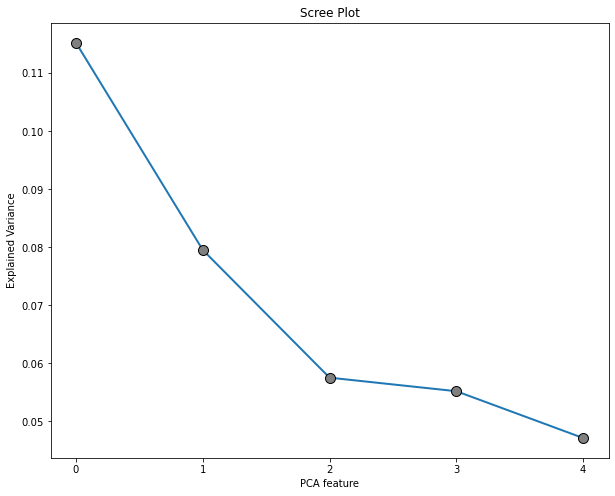

In [17]:
# INSTANTIATING a new model using the first three principal components
pca_P = PCA(n_components = 5,
            random_state = 219)


# FITTING and TRANSFORMING the purchases_scaled
MASD_P_pca = pca_P.fit_transform(MASD_P_transposed2_scaled2)

# calling the scree_plot function
scree_plot(pca_object = pca_P,
           export     = False)

10) Getting the final version of the data we will use with only three of the components.

In [18]:
# INSTANTIATING a new model using the first three principal components
pca_P = PCA(n_components = 3,
            random_state = 219)


# FITTING and TRANSFORMING the purchases_scaled
MASD_P_pca = pca_P.fit_transform(MASD_P_transposed2_scaled2)

11) Getting the factor loadings of the psychometric data and exporting it to excel to check for high negative and positive correlation to be able to determine a pattern on each component with these high correlations and deciding on names for those components accordingly.

In [19]:
# transposing pca components
factor_loadings_P_df = pd.DataFrame(np.transpose(pca_P.components_.round(decimals = 2)))


# naming rows as original features
factor_loadings_P_df = factor_loadings_P_df.set_index(MASD_P_transposed2_scaled2.columns)


# checking the result
print(factor_loadings_P_df)

# saving to Excel
factor_loadings_P_df.to_excel('MASD_factor_loadings_P.xlsx')

           0     1     2
q24r1   0.04 -0.33 -0.09
q24r2   0.31 -0.01  0.14
q24r3   0.16  0.00 -0.01
q24r4   0.02 -0.48 -0.00
q24r5   0.06 -0.03 -0.21
q24r6   0.25  0.01  0.22
q24r7   0.29  0.08 -0.01
q24r8   0.31  0.15  0.05
q24r9  -0.00 -0.51 -0.00
q24r10  0.28  0.17 -0.04
q24r11  0.25  0.15 -0.16
q24r12  0.33  0.17  0.06
q26r18 -0.24  0.15  0.33
q26r3   0.05 -0.09  0.21
q26r4  -0.22  0.04  0.20
q26r5  -0.13 -0.07 -0.10
q26r6  -0.07  0.12  0.01
q26r7  -0.25  0.10  0.27
q26r8  -0.15  0.19 -0.36
q26r9  -0.02  0.18  0.11
q26r10 -0.10  0.27 -0.32
q26r11 -0.11 -0.12 -0.23
q26r12 -0.13  0.16 -0.26
q26r13 -0.13 -0.03 -0.05
q26r14 -0.24  0.12  0.08
q26r15 -0.06  0.10  0.44
q26r16 -0.18  0.02 -0.02
q26r17 -0.08  0.14 -0.03


13) Renaming the PCA’s after analyzing the questions with high correlations and deciding a pattern that fits those high correlations.

In [20]:
# naming each principal component
factor_loadings_P_df.columns = ['Family Technician',
                                'Tech Illiterate',
                                'Brand Fans']

# checking the result
factor_loadings_P_df

,Family Technician,Tech Illiterate,Brand Fans
q24r1,0.04,-0.33,-0.09
q24r2,0.31,-0.01,0.14
q24r3,0.16,0.00,-0.01
q24r4,0.02,-0.48,-0.00
q24r5,0.06,-0.03,-0.21
q24r6,0.25,0.01,0.22
q24r7,0.29,0.08,-0.01
q24r8,0.31,0.15,0.05
q24r9,-0.00,-0.51,-0.00
q24r10,0.28,0.17,-0.04


14) Creating a data frame of the fitted and transformed psychometric scaled data and setting the column titles with the names created for the PCA’s.

In [21]:
# converting into a DataFrame 
MASD_P_pca = pd.DataFrame(MASD_P_pca)


# renaming columns
MASD_P_pca.columns = factor_loadings_P_df.columns


# checking results
MASD_P_pca

,Family Technician,Tech Illiterate,Brand Fans
0,-0.024360,-0.329874,-0.463301
1,-0.238903,2.765477,0.575325
2,-0.909100,2.739014,0.921182
3,-0.713814,2.367696,0.580481
4,2.038464,0.087763,-1.173543
...,...,...,...
1547,1.844903,-0.093533,-0.345343
1548,1.173336,-2.600726,-0.180472
1549,-0.518334,1.050748,1.633071
1550,0.465532,-1.964951,0.721548


<strong>Usage Behavior Features</strong><br>

For the next steps with the usage behavior data treatment every step already mentioned before for the psychometric data is repeated and the only thing that changes is the PCA part.

In [22]:
# transposing dataframe to scale rows
MASD_B_transposed = MASD_B.transpose()

print(MASD_B_transposed.head(n = 5))

print("\n\n")

print(MASD_B_transposed.tail(n = 5))

print("\n\n")

MASD_B_transposed.shape

       0     1     2     3     4     5     6     7     8     9     ...  1542  \
q25r1     5     1     3     2     3     1     2     1     3     2  ...     2   
q25r2     5     2     5     2     2     2     2     1     3     2  ...     1   
q25r3     4     1     4     2     3     2     2     1     3     3  ...     3   
q25r4     5     2     2     2     3     2     1     1     2     2  ...     2   
q25r5     4     2     5     1     3     3     1     2     3     2  ...     2   

       1543  1544  1545  1546  1547  1548  1549  1550  1551  
q25r1     1     4     2     5     1     2     1     2     5  
q25r2     1     3     4     5     1     2     2     2     2  
q25r3     1     3     2     5     1     2     1     1     4  
q25r4     1     4     2     5     1     2     2     2     4  
q25r5     1     3     2     5     1     1     1     1     3  

[5 rows x 1552 columns]



        0     1     2     3     4     5     6     7     8     9     ...  1542  \
q25r8      5     1     4     3     2  

(12, 1552)

In [23]:
# applying the unsupervised_scaler function
MASD_B_transposed_scaled = unsupervised_scaler(df = MASD_B_transposed)


# checking pre- and post-scaling variance
print(np.var(MASD_B_transposed), '\n\n')
print(np.var(MASD_B_transposed_scaled))

print("\n\n")

MASD_B_transposed_scaled.shape

0       0.555556
1       0.243056
2       0.805556
3       0.305556
4       0.555556
          ...   
1547    3.472222
1548    1.409722
1549    0.187500
1550    0.888889
1551    0.743056
Length: 1552, dtype: float64 


0       1.0
1       1.0
2       1.0
3       1.0
4       1.0
       ... 
1547    1.0
1548    1.0
1549    1.0
1550    1.0
1551    1.0
Length: 1552, dtype: float64





(12, 1552)

In [24]:
# transposing dataframe to scale columns
MASD_B_transposed2_scaled = MASD_B_transposed_scaled.transpose()

print(MASD_B_transposed2_scaled.head(n = 5))

print("\n\n")

print(MASD_B_transposed2_scaled.tail(n = 5))

print("\n\n")

MASD_B_transposed2_scaled.shape

         0         1         2         3         4         5         6   \
0  0.894427  0.894427 -0.447214  0.894427 -0.447214  0.894427 -0.447214   
1 -1.183216  0.845154 -1.183216  0.845154  0.845154 -1.183216  0.845154   
2 -0.928477  1.299867  0.185695 -2.042649  1.299867  1.299867  0.185695   
3  0.301511  0.301511  0.301511  0.301511 -1.507557  0.301511 -1.507557   
4  0.894427 -0.447214  0.894427  0.894427  0.894427  0.894427  0.894427   

         7         8         9         10        11  
0  0.894427 -1.788854 -1.788854 -0.447214  0.894427  
1 -1.183216  0.845154  0.845154  0.845154 -1.183216  
2  0.185695  0.185695 -0.928477 -0.928477  0.185695  
3  2.110579  0.301511  0.301511  0.301511 -1.507557  
4 -0.447214 -0.447214 -0.447214 -1.788854 -1.788854  



            0         1         2         3         4         5         6   \
1547 -0.447214 -0.447214 -0.447214 -0.447214 -0.447214  2.236068 -0.447214   
1548 -0.491304 -0.491304 -0.491304 -0.491304 -1.333539  2.035401 -

(1552, 12)

In [25]:
# naming features again
MASD_B_transposed2_scaled.columns = ['q25r1', 'q25r2', 'q25r3', 'q25r4', 'q25r5', 'q25r6', 'q25r7', 'q25r8',
       'q25r9', 'q25r10', 'q25r11', 'q25r12']

In [26]:
# applying the unsupervised_scaler function
MASD_B_transposed2_scaled2 = unsupervised_scaler(df = MASD_B_transposed2_scaled)


# checking pre- and post-scaling variance
print(np.var(MASD_B_transposed2_scaled), '\n\n')
print(np.var(MASD_B_transposed2_scaled2))

print("\n\n")

print((MASD_B_transposed2_scaled2).tail(n=10))

print("\n\n")

MASD_B_transposed2_scaled2.shape

q25r1     0.507067
q25r2     0.568591
q25r3     0.535552
q25r4     0.512149
q25r5     0.599577
q25r6     1.522632
q25r7     0.572625
q25r8     0.702991
q25r9     0.609025
q25r10    0.713728
q25r11    0.613174
q25r12    0.964209
dtype: float64 


q25r1     1.0
q25r2     1.0
q25r3     1.0
q25r4     1.0
q25r5     1.0
q25r6     1.0
q25r7     1.0
q25r8     1.0
q25r9     1.0
q25r10    1.0
q25r11    1.0
q25r12    1.0
dtype: float64



         q25r1     q25r2     q25r3     q25r4     q25r5     q25r6     q25r7  \
1542  0.582975 -1.925097  3.225656  0.707220  0.562949 -0.990103  0.862236   
1543  0.159555  0.074183  0.341618  0.285906  0.173562 -1.234450  0.463791   
1544  0.615178 -0.786351 -0.545064  0.739263 -0.664441 -0.182728 -1.679953   
1545 -0.882885  1.714896 -0.672722 -0.751349 -0.785091  0.570261 -0.517163   
1546  0.159555  0.074183  0.341618  0.285906  0.173562 -1.234450  0.463791   
1547 -0.468478 -0.518899 -0.269485 -0.339003 -0.403992  0.577673 -0.127199   
1548 -0.530394 -0.5773

(1552, 12)

A scree plot wasn’t shown here as after checking for the elbow it was determined that the appropriate number of components was two.

In [27]:
# INSTANTIATING a PCA object with no limit to principal components
pca_B = PCA(n_components = None,
            random_state = 219)


# FITTING and TRANSFORMING the scaled data
MASD_B_pca = pca_B.fit_transform(MASD_B_transposed2_scaled2)


# comparing dimensions of each DataFrame
print("Original shape:", MASD_B_transposed2_scaled2.shape)
print("PCA shape     :", MASD_B_pca.shape)

Original shape: (1552, 12)
PCA shape     : (1552, 12)


Zooming in at the scree plot to show that the elbow of the plot is at two components.

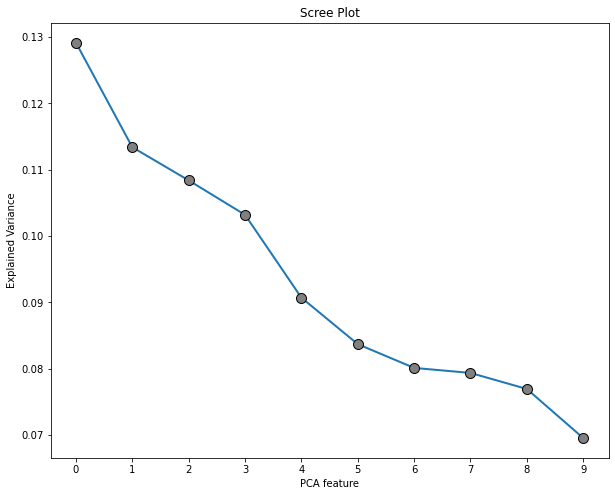

In [28]:
# INSTANTIATING a new model using the first three principal components
pca_B = PCA(n_components = 10,
            random_state = 219)


# FITTING and TRANSFORMING the purchases_scaled
MASD_B_pca = pca_B.fit_transform(MASD_B_transposed2_scaled2)

# calling the scree_plot function
scree_plot(pca_object = pca_B,
           export     = False)

Getting the final version of the data we will use with only two of the components.


In [29]:
# INSTANTIATING a new model using the first three principal components
pca_B = PCA(n_components = 2,
            random_state = 219)


# FITTING and TRANSFORMING the purchases_scaled
MASD_B_pca = pca_B.fit_transform(MASD_B_transposed2_scaled2)

Getting the factor loadings of the behavioral data and exporting it to excel to check for high negative and positive correlation to be able to determine a pattern on each component with these high correlations and deciding on names for those components accordingly.

In [30]:
# transposing pca components
factor_loadings_B_df = pd.DataFrame(np.transpose(pca_B.components_.round(decimals = 2)))


# naming rows as original features
factor_loadings_B_df = factor_loadings_B_df.set_index(MASD_B_transposed2_scaled2.columns)


# checking the result
print(factor_loadings_B_df)

# saving to Excel
factor_loadings_B_df.to_excel('MASD_factor_loadings_B.xlsx')

           0     1
q25r1   0.35 -0.21
q25r2   0.10 -0.36
q25r3   0.14 -0.00
q25r4   0.46  0.05
q25r5   0.10 -0.38
q25r6  -0.62 -0.16
q25r7   0.17  0.09
q25r8   0.09 -0.31
q25r9   0.02  0.19
q25r10  0.08  0.54
q25r11  0.08  0.46
q25r12 -0.44  0.11


Renaming the PCA’s after analyzing the questions with high correlations and deciding a pattern that fits those high correlations.


In [31]:
# naming each principal component
factor_loadings_B_df.columns = ['Natural Leaders',
                                'Eager Followers']

# checking the result
factor_loadings_B_df

,Natural Leaders,Eager Followers
q25r1,0.35,-0.21
q25r2,0.10,-0.36
q25r3,0.14,-0.00
q25r4,0.46,0.05
q25r5,0.10,-0.38
q25r6,-0.62,-0.16
q25r7,0.17,0.09
q25r8,0.09,-0.31
q25r9,0.02,0.19
q25r10,0.08,0.54


Creating a data frame of the fitted and transformed usage behavior scaled data and setting the column titles with the names created for the PCA’s.

In [32]:
# converting into a DataFrame 
MASD_B_pca = pd.DataFrame(MASD_B_pca)


# renaming columns
MASD_B_pca.columns = factor_loadings_B_df.columns


# checking results
MASD_B_pca

,Natural Leaders,Eager Followers
0,1.071016,-2.153167
1,2.528526,1.892913
2,-1.032870,-1.944093
3,1.907153,0.294855
4,2.711757,-1.433937
...,...,...
1547,-0.408291,-0.858354
1548,-0.730253,1.364831
1549,-0.012760,2.318709
1550,-1.233759,1.715993


<strong>CLUSTERING</strong><br>

Grouping the psychometrical and usage behavior data.

In [33]:
# concatinating cluster memberships with principal components
PnB_pca_df = pd.concat([MASD_P_pca,
                          MASD_B_pca],
                          axis = 1)

PnB_pca_df.to_excel('MASD_factor_loadings_all.xlsx')

In [34]:
PnB_pca_df.tail(5)

,Family Technician,Tech Illiterate,Brand Fans,Natural Leaders,Eager Followers
1547,1.844903,-0.093533,-0.345343,-0.408291,-0.858354
1548,1.173336,-2.600726,-0.180472,-0.730253,1.364831
1549,-0.518334,1.050748,1.633071,-0.012760,2.318709
1550,0.465532,-1.964951,0.721548,-1.233759,1.715993
1551,-1.033757,-1.058370,-0.402956,1.327344,-0.025109


In [35]:
# checking variance amongst clusters
np.var(PnB_pca_df)

Family Technician    3.227342
Tech Illiterate      2.227236
Brand Fans           1.604743
Natural Leaders      1.549680
Eager Followers      1.360670
dtype: float64

In [36]:
# applying the unsupervised_scaler function
pca_scaled = unsupervised_scaler(df = PnB_pca_df)


# checking pre- and post-scaling variance
print(np.var(PnB_pca_df), '\n\n')
print(np.var(pca_scaled))

Family Technician    3.227342
Tech Illiterate      2.227236
Brand Fans           1.604743
Natural Leaders      1.549680
Eager Followers      1.360670
dtype: float64 


Family Technician    1.0
Tech Illiterate      1.0
Brand Fans           1.0
Natural Leaders      1.0
Eager Followers      1.0
dtype: float64


In this step we will begin clustering the data in five stages as we consider five to be the correct number of clusters because we see five main groups in the dendrogram. Clustering the data will group survey participants in similar groups.

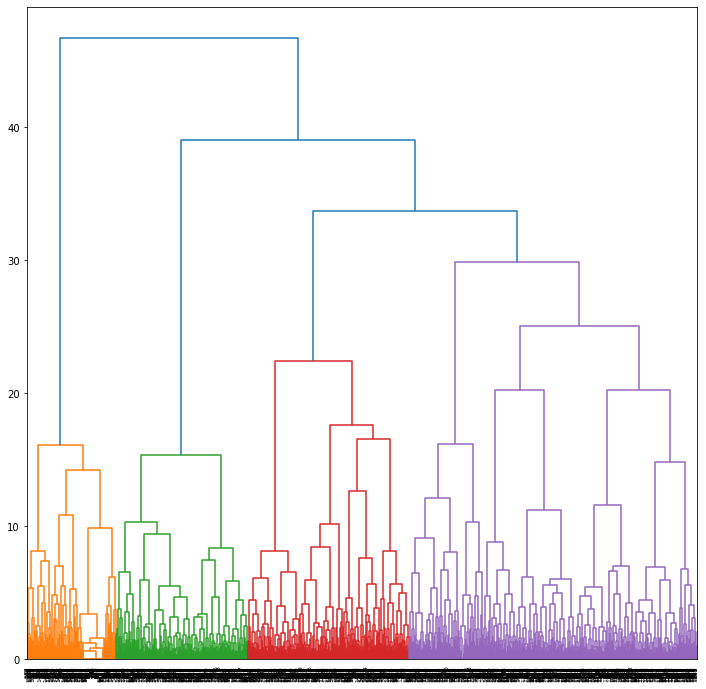

In [37]:
# grouping data based on Ward distance
standard_mergings_ward = linkage(y = pca_scaled,
                                 method = 'ward',
                                 optimal_ordering = True)


# setting plot size
fig, ax = plt.subplots(figsize=(12, 12))

# developing a dendrogram
dendrogram(Z = standard_mergings_ward,
           leaf_rotation = 90,
           leaf_font_size = 6)


# rendering the plot
plt.show()

In [38]:
# INSTANTIATING a k-Means object with five clusters
MASD_k_pca = KMeans(n_clusters   = 5,
                        random_state = 219)


# fitting the object to the data
MASD_k_pca.fit(pca_scaled)


# converting the clusters to a DataFrame
MASD_kmeans_pca = pd.DataFrame({'Cluster': MASD_k_pca.labels_})


# checking the results
print(MASD_kmeans_pca.iloc[: , 0].value_counts())

2    382
3    312
0    293
1    285
4    280
Name: Cluster, dtype: int64


The centroids of the clusters show relevant information as for the Family Technician we have found the most positive 1.18 which show a great affinity to being family technicians. The same logic works for the other PCA's depending on its sign. For Tech Illiterate we have found -1.14, for Brand Fans we have -1.26, for Natural Leaders we have 1.08 and for the Eager Followers we have -1.30 after PCA. Which is clearly a good sign for this assignment.

In [39]:
# storing cluster centers
centroids_pca = MASD_k_pca.cluster_centers_


# converting cluster centers into a DataFrame
centroids_pca_df = pd.DataFrame(centroids_pca)


# renaming principal components
centroids_pca_df.columns = ["Family Technician",
                            "Tech Illiterate",
                            "Brand Fans",
                            "Natural Leaders",
                            "Eager Followers"]


# checking results (clusters = rows, pc = columns)
centroids_pca_df.round(2)

,Family Technician,Tech Illiterate,Brand Fans,Natural Leaders,Eager Followers
0,-0.86,0.52,0.68,-0.19,0.28
1,0.07,0.24,-1.26,-0.55,0.06
2,-0.10,-1.14,0.14,-0.79,0.16
3,1.18,0.33,0.62,1.08,0.65
4,-0.35,0.41,-0.33,0.63,-1.30


In the next step we join all the data with the demographical features to draw insights.

In [40]:
# concatinating cluster memberships with principal components
MASD_pca_df = pd.concat([ PnB_pca_df,
                          MASD_kmeans_pca],
                          axis = 1)


# concatenating demographic information with pca-clusters
final_pca_MASD_df = pd.concat([MASD_pca_df.round(decimals = 2),
                               MASD_D],
                              axis = 1)


# renaming columns
final_pca_MASD_df.columns = ["Family Technician",
                            "Tech Illiterate",
                            "Brand Fans",
                            "Natural Leaders",
                            "Eager Followers",
                            "Cluster Group",
                            'Age', 'own_iphone', 'own_ipod', 'own_android', 'own_bb', 'own_nokia', 'own_windows', 'own_hp', 'own_tablet',
       'own_other', 'own_none', 'use_music', 'use_tvcheck', 'use_entertain', 'use_tvshow', 'use_gaming', 'use_social', 'use_news',
       'use_shopping', 'use_specific', 'use_other', 'use_none', 'number_apps', 'percent_free', 'visit_fb', 'visit_tw',
       'visit_mysp', 'visit_pand', 'visit_vevo', 'visit_yt', 'visit_aol', 'visit_lfm', 'visit_yah', 'visit_imdb',
       'visit_lkdin', 'visit_ntflx', 'education', 'marital_status', 'child_no', 'child_yu6', 'child_612', 'child_1317',
       'child_18up', 'race', 'hispanic', 'salary', 'gender']


# checking the results
print(final_pca_MASD_df.head(n = 5))

   Family Technician  Tech Illiterate  Brand Fans  Natural Leaders  \
0              -0.02            -0.33       -0.46             1.07   
1              -0.24             2.77        0.58             2.53   
2              -0.91             2.74        0.92            -1.03   
3              -0.71             2.37        0.58             1.91   
4               2.04             0.09       -1.17             2.71   

   Eager Followers  Cluster Group  Age  own_iphone  own_ipod  own_android  \
0            -2.15              4   10           0         0            1   
1             1.89              3    5           0         0            1   
2            -1.94              4    7           0         0            0   
3             0.29              0    7           1         1            0   
4            -1.43              4    2           1         0            0   

   ...  marital_status  child_no  child_yu6  child_612  child_1317  \
0  ...               4         1          0   

In [41]:
final_pca_MASD_df.columns

Index(['Family Technician', 'Tech Illiterate', 'Brand Fans', 'Natural Leaders',
       'Eager Followers', 'Cluster Group', 'Age', 'own_iphone', 'own_ipod',
       'own_android', 'own_bb', 'own_nokia', 'own_windows', 'own_hp',
       'own_tablet', 'own_other', 'own_none', 'use_music', 'use_tvcheck',
       'use_entertain', 'use_tvshow', 'use_gaming', 'use_social', 'use_news',
       'use_shopping', 'use_specific', 'use_other', 'use_none', 'number_apps',
       'percent_free', 'visit_fb', 'visit_tw', 'visit_mysp', 'visit_pand',
       'visit_vevo', 'visit_yt', 'visit_aol', 'visit_lfm', 'visit_yah',
       'visit_imdb', 'visit_lkdin', 'visit_ntflx', 'education',
       'marital_status', 'child_no', 'child_yu6', 'child_612', 'child_1317',
       'child_18up', 'race', 'hispanic', 'salary', 'gender'],
      dtype='object')

In [42]:
# Renaming all demographic questions

cluster_groups = {0: 'Cluster 1',
                  1: 'Cluster 2',
                  2: 'Cluster 3',
                  3: 'Cluster 4',
                  4: 'Cluster 5'}

age_range_groups = {1: 'Under 18',
                   2:  '18 - 24',
                   3:  '25 - 29',
                   4:  '30 - 34',
                   5:  '35 - 39',
                   6:  '40 - 44',
                   7:  '45 - 49',
                   8:  '50 - 54',
                   9:  '55 - 59',
                   10: '60 - 64',
                   11: '65 or over'}

salary_range_groups = {1: 'Under $10K',
                       2: '$10,000 - $14,999',
                       3: '$15,000 - $19,999',
                       4: '$20,000 - $29,999',
                       5: '$30,000 - $39,999',
                       6: '$40,000 - $49,999',
                       7: '$50,000 - $59,999',
                       8: '$60,000 - $69,999',
                       9: '$70,000 - $79,999',
                       10: '$80,000 - $89,999',
                       11: '$90,000 - $99,999',
                       12: '$100,000 - $124,999',
                       13: '$125,000 - $149,999',
                       14: '$150,000 or over'}

race_groups = {1: 'White',
               2: 'Black',
               3: 'Asian',
               4: 'Hawaiian or Pac',
               5: 'Amer-Ind or Ala-Nat',
               6: 'Other race'}

hispanic_groups = {1: 'Yes',
                   2: 'No'}

gender_groups = {1: 'Male',
                 2: 'Female'}

marital_groups = {1: 'Married',
                  2: 'Single',
                  3: 'Single with Partner',
                  4: 'Separated/Widowed/Divorced'}

number_apps_groups = {1: '1 - 5',
                      2: '6 - 10',
                      3: '11 - 30',
                      4: '31+',
                      5: "Don't know",
                      6: 'None'}

final_pca_MASD_df['Cluster Group'].replace(cluster_groups, inplace = True)
final_pca_MASD_df['Age'].replace(age_range_groups, inplace = True)
final_pca_MASD_df['salary'].replace(salary_range_groups, inplace = True)
final_pca_MASD_df['race'].replace(race_groups, inplace = True)
final_pca_MASD_df['hispanic'].replace(hispanic_groups, inplace = True)
final_pca_MASD_df['gender'].replace(gender_groups, inplace = True)
final_pca_MASD_df['marital_status'].replace(marital_groups, inplace = True)
final_pca_MASD_df['number_apps'].replace(number_apps_groups, inplace = True)

MASD_final_df = final_pca_MASD_df

MASD_final_df

,Family Technician,Tech Illiterate,Brand Fans,Natural Leaders,Eager Followers,Cluster Group,Age,own_iphone,own_ipod,own_android,...,marital_status,child_no,child_yu6,child_612,child_1317,child_18up,race,hispanic,salary,gender
0,-0.02,-0.33,-0.46,1.07,-2.15,Cluster 5,60 - 64,0,0,1,...,Separated/Widowed/Divorced,1,0,0,0,0,Black,No,"$30,000 - $39,999",Male
1,-0.24,2.77,0.58,2.53,1.89,Cluster 4,35 - 39,0,0,1,...,Married,0,1,1,0,0,Asian,No,"$80,000 - $89,999",Female
2,-0.91,2.74,0.92,-1.03,-1.94,Cluster 5,45 - 49,0,0,0,...,Separated/Widowed/Divorced,0,0,0,1,0,Black,No,"$40,000 - $49,999",Male
3,-0.71,2.37,0.58,1.91,0.29,Cluster 1,45 - 49,1,1,0,...,Married,0,1,1,0,0,White,No,"$30,000 - $39,999",Male
4,2.04,0.09,-1.17,2.71,-1.43,Cluster 5,18 - 24,1,0,0,...,Single,1,0,0,0,0,Asian,No,"$20,000 - $29,999",Female
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1547,1.84,-0.09,-0.35,-0.41,-0.86,Cluster 2,18 - 24,1,1,0,...,Single,0,1,0,0,0,Other race,Yes,Under $10K,Male
1548,1.17,-2.60,-0.18,-0.73,1.36,Cluster 3,30 - 34,1,1,0,...,Married,0,1,1,0,0,White,No,"$70,000 - $79,999",Female
1549,-0.52,1.05,1.63,-0.01,2.32,Cluster 1,25 - 29,1,1,0,...,Single,0,0,1,1,0,White,No,"$100,000 - $124,999",Female
1550,0.47,-1.96,0.72,-1.23,1.72,Cluster 3,18 - 24,1,0,1,...,Single,1,0,0,0,0,Other race,Yes,"$50,000 - $59,999",Male


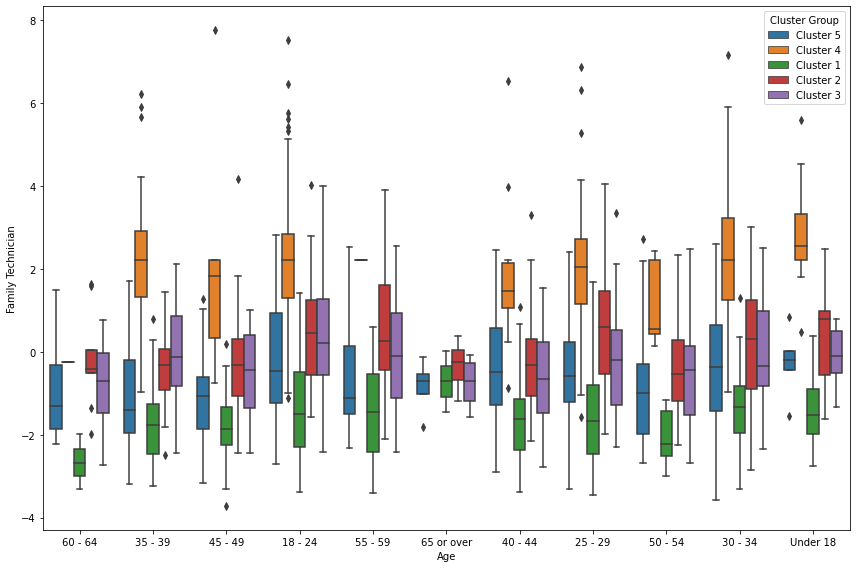

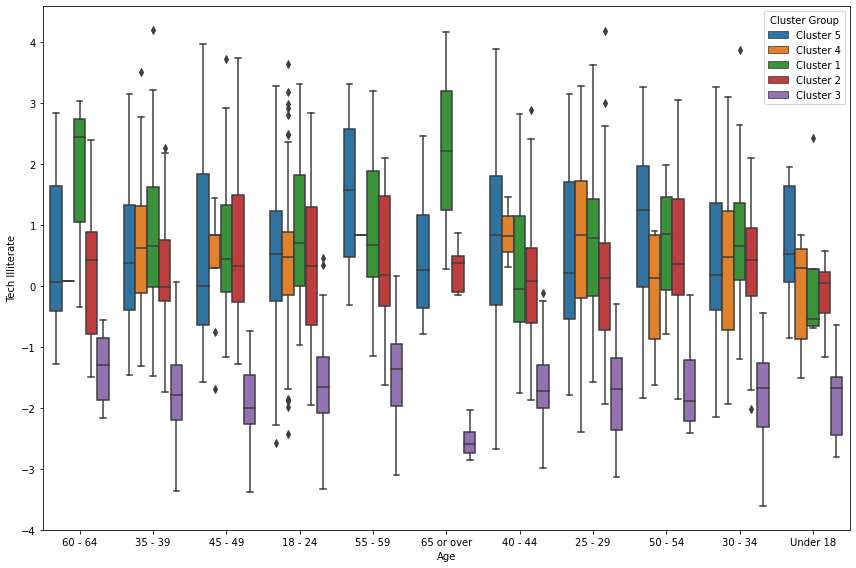

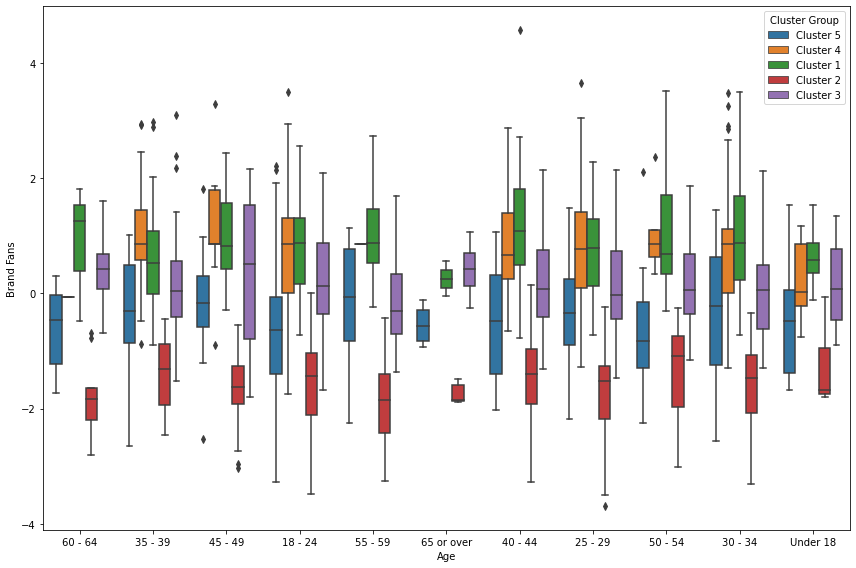

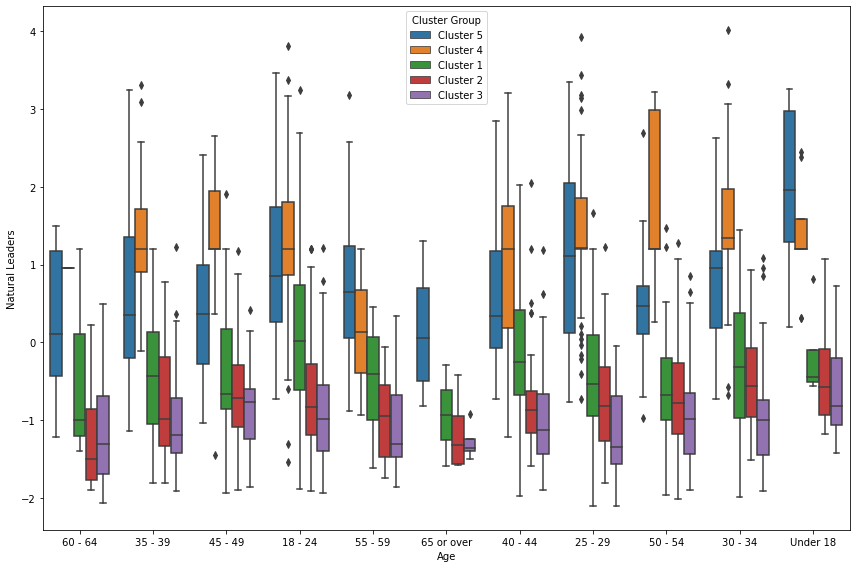

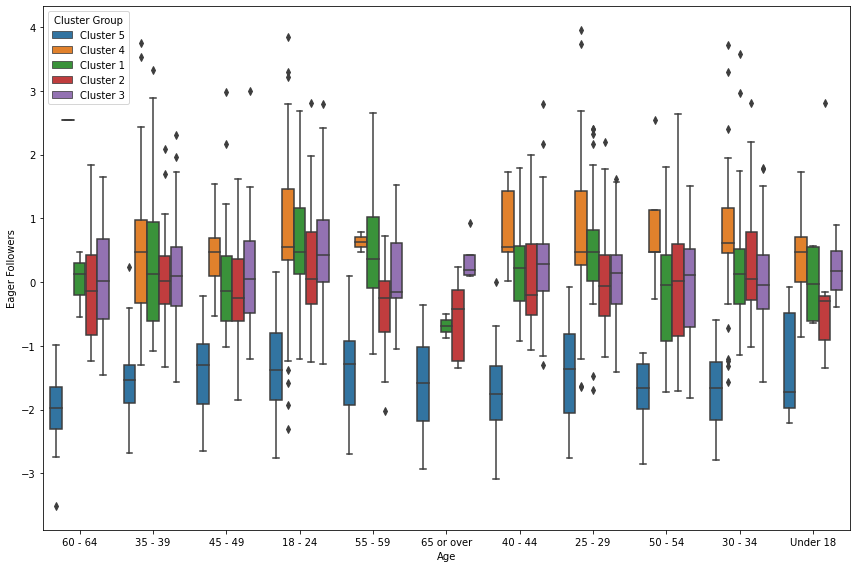

In [43]:
########################
# Age vs Cluster
########################

cluster_list = ["Family Technician",
                "Tech Illiterate",
                "Brand Fans",
                "Natural Leaders",
                "Eager Followers"]

for cluster in cluster_list:
    fig, ax = plt.subplots(figsize = (12, 8))
    sns.boxplot(x    = 'Age',
                y    = cluster,
                hue  = 'Cluster Group',
                data = MASD_final_df)


# formatting and displaying the plot
    plt.tight_layout()
    plt.show()

In order to interpret the data we created several box plots and plotted the clusters against the age groups to determine any trends throughout our mobile app survey users. The five main components that we discovered and subsequently labeled are: 
    (i) ‘Family Technician’, those that are up to date with technology, stay connected, and act as their family’s IT team;
    (ii) ‘Tech Illiterate’, people who do not follow tech news but have no issue being surrounded by tech, are most likely unaware of the vast amount of data on the internet, and are eager to show off their new apps as they are easily amazed by new tech; 
    (iii) ‘Brand Fans’, generally uninformed customers that heavily prioritize luxury goods, specific brand names, and are likely to be very susceptible to marketing campaigns;
    (iv) ‘Natural Leader’, participants that have a desire to be a leader of their group, do not like being told what to do, and are good at time management, and;
    (v) ‘Eager Followers’, users that are more timid but open minded and prefer leadership.

   We grouped our mobile app survey users into five clusters that we believe fit into the principal components listed above. As seen in the first boxplot, those that are in the orange cluster 4 are more likely to fall under the ‘Family Technician’ component across nearly every age range. It is apparent that the younger the age of the participant the more likely they are to fall into the ‘Family Technician’ component. This is par for the course as the youth are generally more in tune with technological advancements and fall out of touch the older they get. 

   The next plot portrays a clear break away by the purple cluster 3 in the ‘Tech Illiterate’ component. Those in cluster 3 show a strong understanding of technology and build upon their knowledge over time. Cluster 3 people will not be amazed by flashy marketing campaigns nor smoke and mirrors. Create a well made product and advertise the practical uses to entice these users. 

   The third plot highlights those that are ‘Brand Fans’, or those that prioritize design and style over functionality. Here it is apparent that those in the red cluster 2 have no real desire to buy the top brands or designs. Cluster 2 people are likely to search for better deals and prioritize functionality over style. It is likely that cluster 2 people will utilize coupons and attend sales, compared to green cluster 1 or orange cluster 4 that would be more susceptible to ads and marketing campaigns. 
	
   Plot #4 shows the affinity for those in clusters 4 and 5 to be ‘Natural Leaders’. Interestingly we see two areas of consideration that must be explained. Those in the blue cluster 5 show a stronger leadership profile the younger they are and then slowly transition away from wanting to be a leader the older they get. This could be due to people in cluster 5 being more ‘Tech Illiterate’ and learn of their shortcomings the older they get. Contrast this with those in cluster 4 who show leadership traits as well but rank higher in the ‘Family Technician’ component, therefore implying that they have a better understanding of tech and are able to succeed in a leadership role.  

   The last plot shows essentially the inverse of the above and highlights those that would fall under the ‘Eager Followers’ component. Once again, the blue cluster 5 shows a big negative correlation to being a follower throughout all age ranges. 

   Overall, the recommended strategies for each cluster would be:
    Cluster 1: Use flashy marketing campaigns to seem trendy
    Cluster 2: Have sales and send coupons
    Cluster 3: Create a new solid product and market futuristic aspects
    Cluster 4: Have a new product that the whole family can use
    Cluster 5: Make the customer feel in control
